# Preliminaries

### Imports

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np

### Functions

# Preprocessing

### Preprocessing

Reading the combined data

In [90]:
df = pd.read_csv('CleanedData/dataset.csv')

Transforming features into usable data types

In [91]:
df['averageRating'] = np.where((df['averageRating'] >= 0) & (df['averageRating'] <= 3.33), 0,
                      np.where((df['averageRating'] > 3.33) & (df['averageRating'] <= 6.66), 1, 2))


EDA

In [92]:
df = df.drop(columns=['isAdult'])
# Remove the isAdult column from the dataset since there are only 4 adult movies in the dataset

In [93]:
# more eda shit here

Labeling / encoding

In [94]:
# Label encode the studio column
label_encoder = LabelEncoder()
df['studio'] = label_encoder.fit_transform(df['studio'])

In [95]:
df['genres'] = df['genres'].str.split(',')
df = pd.concat([df, df['genres'].str.join('|').str.get_dummies()], axis=1)
df.drop('genres', axis=1, inplace=True)

Scaling

In [96]:
scaler = MinMaxScaler()
columns_to_scale = ['releaseYear', 'runtimeMinutes', 'studio', 'lifetimeGross',
                    'nrOfLanguages', 'director_nrOfMovies', 'nrOfEmployees',
                    'nrOfActors', 'numVotes', 'sameYearTotalMoviesReleased']

df_scaled = df.copy()

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [97]:
df_scaled.to_csv('CleanedData/dataset_preprocessed.csv', index=False)

# Dimensionality reduction

Imports

In [98]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

### 1. Principal component analysis

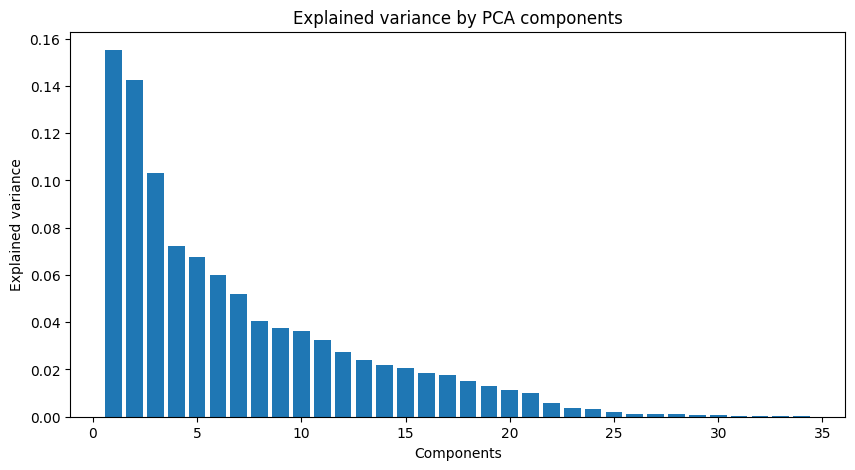

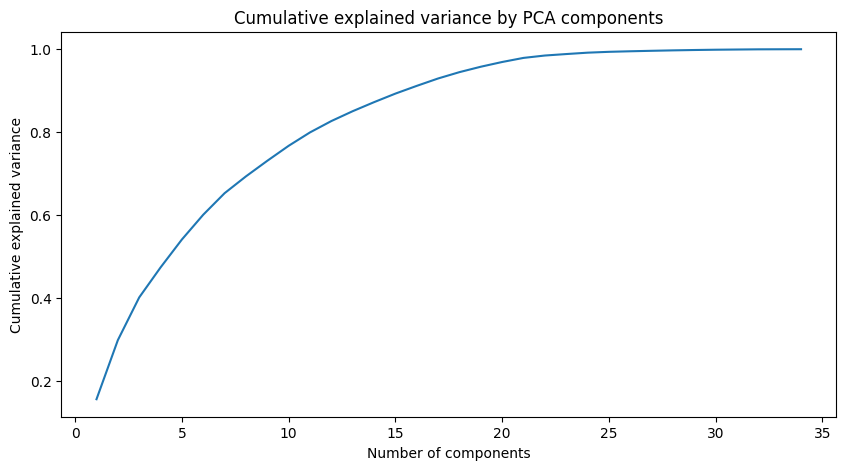

                                  PC1       PC2       PC3       PC4       PC5  \
releaseYear                  0.001741 -0.025171  0.034494  0.020165 -0.028919   
runtimeMinutes              -0.014196 -0.002152 -0.011160  0.007834  0.001856   
studio                      -0.006005  0.009232 -0.051365 -0.016274  0.031738   
lifetimeGross                0.011045 -0.001094 -0.013248  0.012799  0.004723   
nrOfLanguages                0.002577  0.002515 -0.032672  0.009640  0.012303   
director_nrOfMovies          0.001888  0.002458 -0.003854  0.000064  0.000711   
nrOfEmployees               -0.002986  0.010020 -0.026539  0.010742  0.002737   
nrOfActors                  -0.024621  0.038190 -0.069240  0.013085  0.015610   
numVotes                     0.003713 -0.004202 -0.011307  0.007577  0.003490   
sameYearTotalMoviesReleased  0.007759 -0.081069  0.096135  0.066872 -0.084189   
Action                       0.101622 -0.119549 -0.237151  0.130735  0.019063   
Adult                       

In [99]:
pca = PCA()  
features = df_scaled.drop('averageRating', axis=1)
principalComponents = pca.fit_transform(features)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(principalComponents[0]))], index=features.columns)
print(loading_matrix)


print("$$$$$$$$$$$$$$$$$$$$$$$$$")
abs_loading_matrix = np.abs(loading_matrix)

significant_components = abs_loading_matrix.iloc[:5]  
mean_loadings = significant_components.mean(axis=0)
sorted_loadings = mean_loadings.sort_values()

print("Features sorted by their contributions (ascending):")
print(sorted_loadings)




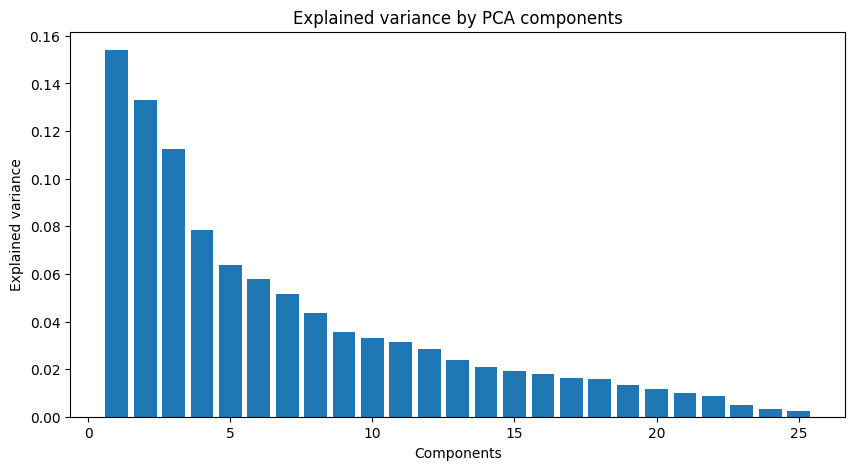

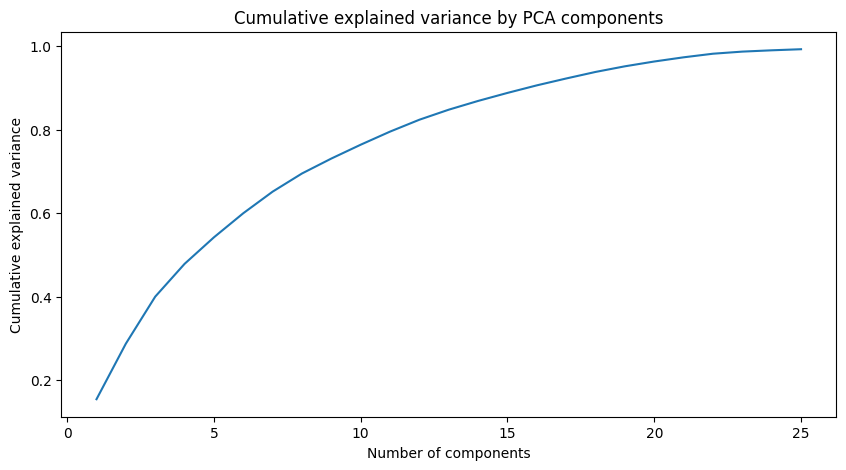

In [100]:
n = 25 
pca_reduced = PCA(n_components=n)
principalComponents_reduced = pca_reduced.fit_transform(df_scaled)

df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=[f'PC{i+1}' for i in range(n)])

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_reduced.explained_variance_ratio_) + 1), pca_reduced.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca_reduced.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

### 2. t-distributed stochastic neighbor embedding

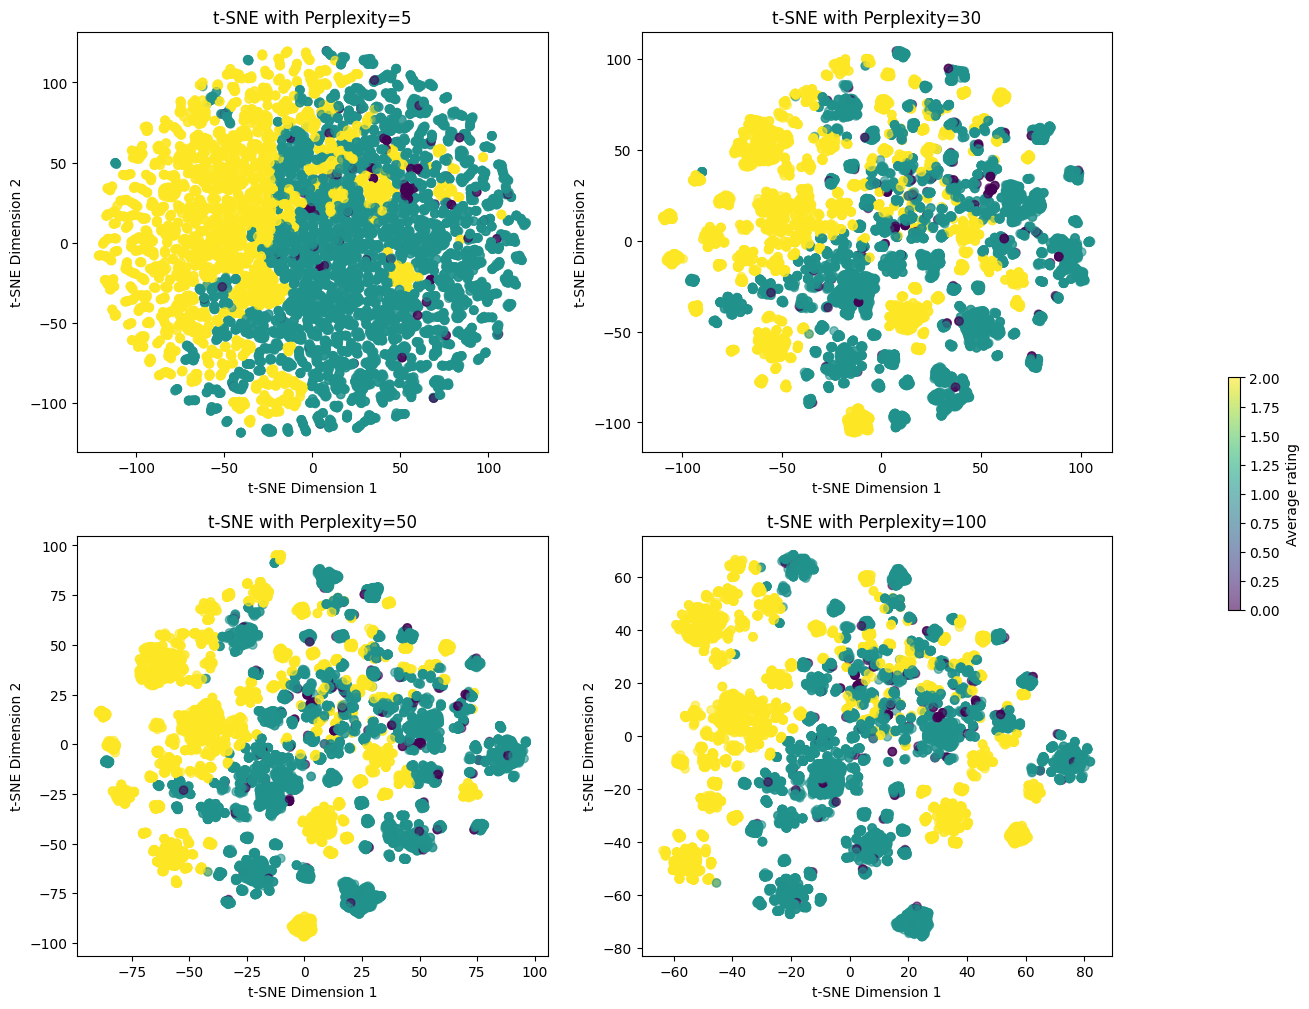

In [101]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_components = 2
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=1000, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)
    sc = axs[idx].scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['averageRating'], cmap='viridis', alpha=0.6)
    axs[idx].set_title(f't-SNE with Perplexity={perplexity}')
    axs[idx].set_xlabel('t-SNE Dimension 1')
    axs[idx].set_ylabel('t-SNE Dimension 2')

fig.colorbar(sc, ax=axs, orientation='vertical', fraction=0.01, pad=0.1, label='Average rating')
plt.show()


In [102]:
tsne = TSNE(random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_features)


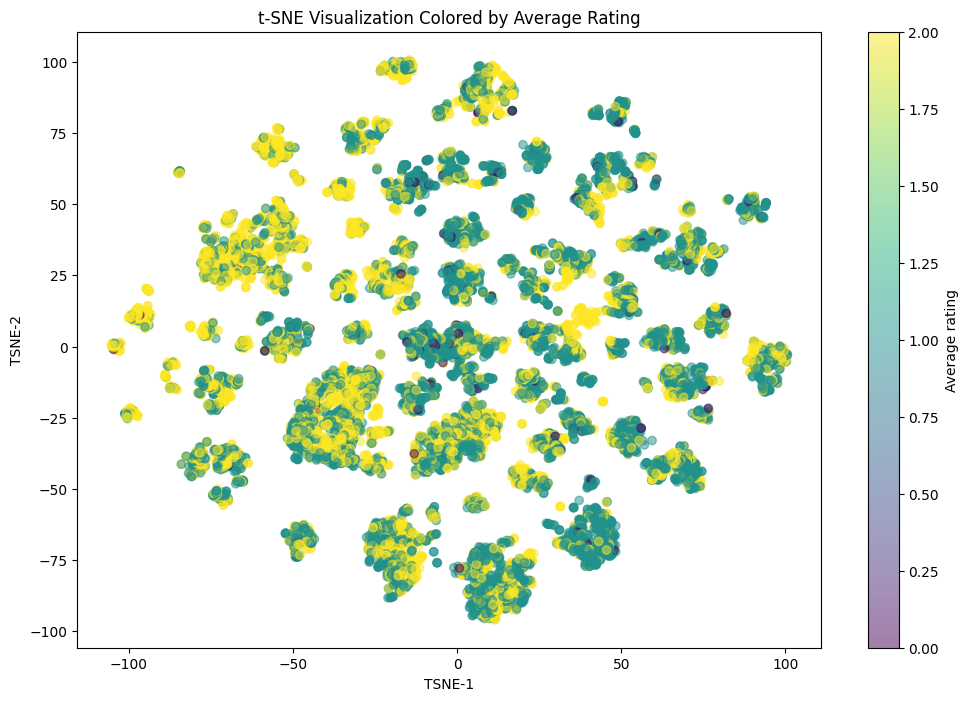

In [103]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Average rating')
plt.title('t-SNE Visualization Colored by Average Rating')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

### 3. Linear Discriminant Analysis

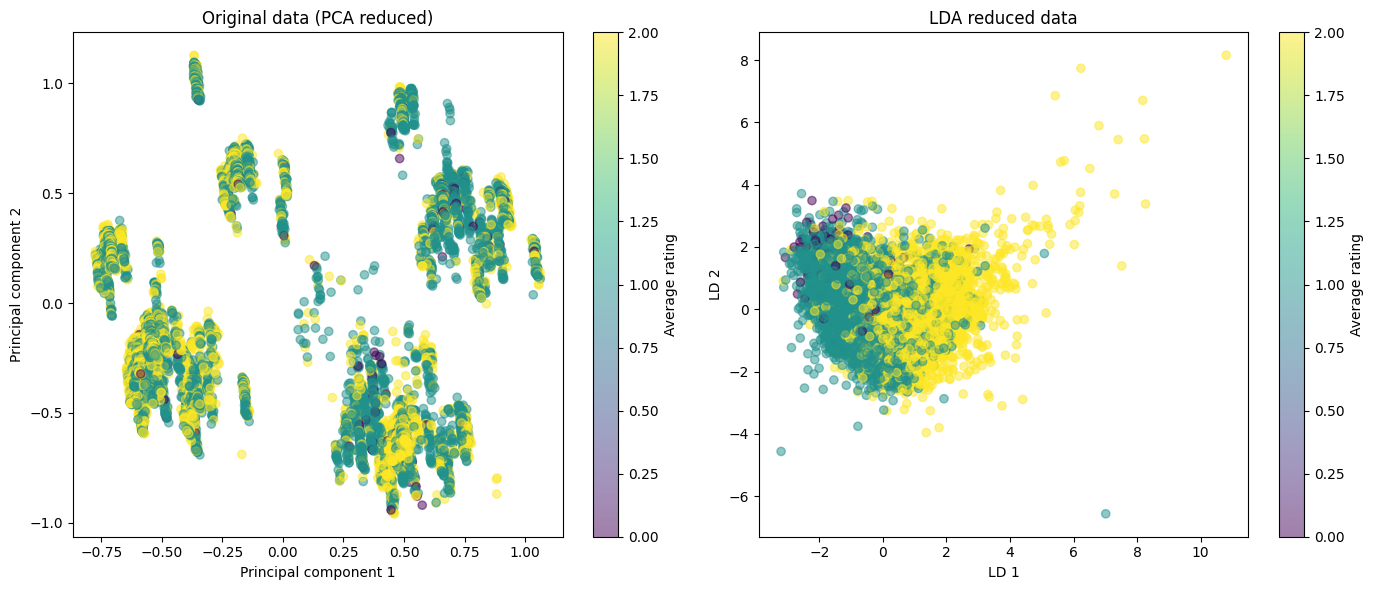

In [104]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

features = df_scaled.drop('averageRating', axis=1)
labels = df['averageRating']
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, alpha=0.5)
plt.title('Original data (PCA reduced)')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar(label='Average rating')
lda = LDA(n_components=2) 
features_lda = lda.fit_transform(features, labels)

plt.subplot(1, 2, 2) 
plt.scatter(features_lda[:, 0], features_lda[:, 1], c=labels, alpha=0.5)
plt.title('LDA reduced data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Average rating')

plt.tight_layout()
plt.show()
